###**Import Library**

In [287]:
# Load libraries
import datetime
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

###**Load Dataset**

In [288]:
df_train = pd.read_csv('/content/data latih.csv')
df_test = pd.read_csv('/content/data uji.csv')

In [289]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1072020,7925000000,7950000000,7750000000,7800000000,10729600
1,2072020,7800000000,8050000000,7800000000,8050000000,15082500
2,3072020,8000000000,8075000000,7900000000,7900000000,8394200
3,6072020,7950000000,8000000000,7875000000,7900000000,17782600
4,7072020,7925000000,8000000000,7850000000,7925000000,14181500


In [290]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,17112022,4600000000,4610000000,4560000000,4590000000,12105800
1,18112022,4590000000,4660000000,4560000000,4640000000,16515900
2,21112022,4630000000,4630000000,4550000000,4550000000,13807100
3,22112022,4570000000,4620000000,4560000000,4560000000,18963600
4,23112022,4580000000,4590000000,4550000000,4550000000,8656200


###**Exploratory Data Analysis**

In [291]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Date    582 non-null    int64
 1   Open    582 non-null    int64
 2   High    582 non-null    int64
 3   Low     582 non-null    int64
 4   Close   582 non-null    int64
 5   Volume  582 non-null    int64
dtypes: int64(6)
memory usage: 27.4 KB


In [292]:
# Mengecek dimensi data
print('Data Train :', df_train.shape)
print('Data Test :', df_test.shape)

Data Train : (582, 6)
Data Test : (146, 6)


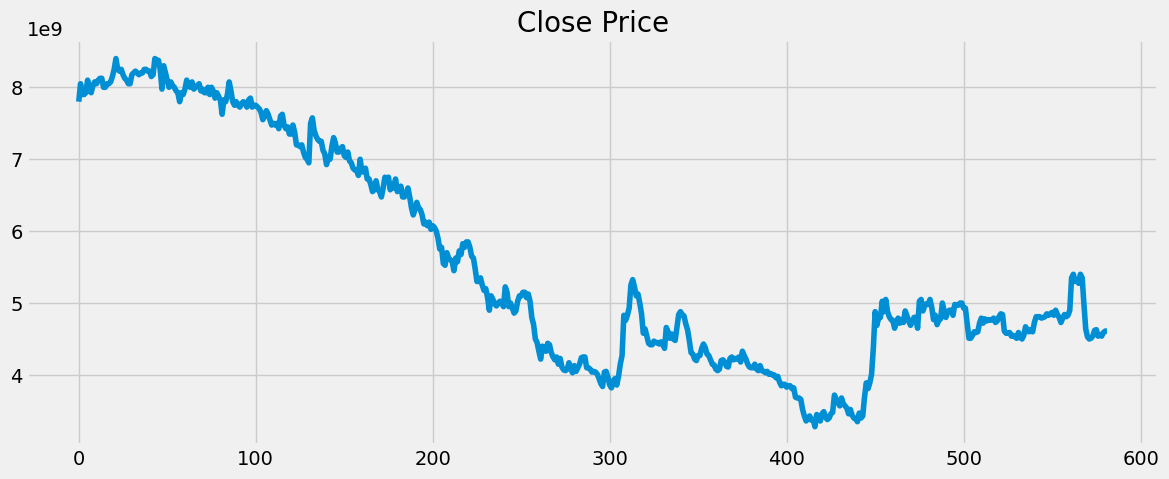

In [293]:
# Mengecek pola data
plt.figure(figsize=(13,5))
plt.plot(df_train.index, df_train['Close'])
plt.title('Close Price', fontsize=20);

In [294]:
# Melihat statistik data
df_test.describe()

,Date,Open,High,Low,Close,Volume
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,1.603360e+07,4.505514e+09,4.542500e+09,4.453767e+09,4.503048e+09,1.582607e+07
std,8.720106e+06,2.273230e+08,2.255738e+08,2.244261e+08,2.325224e+08,2.076737e+07
min,1.022023e+06,4.070000e+09,4.100000e+09,3.960000e+09,4.060000e+09,0.000000e+00
25%,9.014523e+06,4.350000e+09,4.370000e+09,4.260000e+09,4.300000e+09,7.933675e+06
50%,1.602702e+07,4.520000e+09,4.555000e+09,4.480000e+09,4.520000e+09,1.200150e+07
75%,2.311952e+07,4.710000e+09,4.740000e+09,4.660000e+09,4.710000e+09,1.673635e+07
max,3.105202e+07,5.025000e+09,5.050000e+09,4.920000e+09,5.025000e+09,2.216627e+08


In [295]:
df_test.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

###**Preprocessing Data**

####Normalisasi Data

In [296]:
# Normalisasi data menggunakan MinMax scaler
scaler = MinMaxScaler((0,1))
X_train_norm = scaler.fit_transform(df_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=df_train.columns)
X_test_norm = scaler.transform(df_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=df_test.columns)

In [297]:
X_train_norm.head()

,Date,Open,High,Low,Close,Volume
0,0.001662,0.907045,0.900794,0.886026,0.882812,0.032216
1,0.034907,0.882583,0.920635,0.895937,0.931641,0.049756
2,0.068152,0.921722,0.925595,0.915758,0.902344,0.022805
3,0.167886,0.911937,0.910714,0.910803,0.902344,0.060636
4,0.201130,0.907045,0.910714,0.905847,0.907227,0.046125


In [298]:
X_test_norm.head()

,Date,Open,High,Low,Close,Volume
0,0.534907,0.256360,0.238095,0.253717,0.255859,0.037761
1,0.568152,0.254403,0.248016,0.253717,0.265625,0.055531
2,0.667886,0.262231,0.242063,0.251734,0.248047,0.044616
3,0.701130,0.250489,0.240079,0.253717,0.250000,0.065395
4,0.734375,0.252446,0.234127,0.251734,0.248047,0.023861


####Menentukan Fitur dan Target

In [299]:
# Data training
X_train = X_train_norm.drop(columns=['Date', 'Close'])
y_train = X_train_norm['Close']

# Data testing
X_test = X_test_norm.drop(columns=['Date', 'Close'])
y_test = X_test_norm['Close']

In [303]:
X_train = X_train.values
X_test = X_test.values

###**Training Model SVM**

In [304]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [305]:
y_pred = svr.predict(X_test)

In [306]:
score = svr.score(X_test, y_test)
print(score)

0.8768647479359601


In [307]:
# Mengukur kinerja model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAPE: {mape}")
print(f"MAE: {mae}")

MSE: 0.00025222453733664344
MAPE: 3.957418665558074
MAE: 0.009347116852233448


In [308]:
y_pred

array([0.25001692, 0.25031763, 0.25155709, 0.24547008, 0.24889313,
       0.24994589, 0.24606658, 0.24998641, 0.26587263, 0.27421338,
       0.27992498, 0.27268259, 0.27951147, 0.2746096 , 0.27105231,
       0.2553256 , 0.25881511, 0.25750246, 0.2669881 , 0.27431408,
       0.27018002, 0.27396416, 0.28784142, 0.28124668, 0.28743018,
       0.29108236, 0.29516801, 0.29350252, 0.28759256, 0.28871684,
       0.28042834, 0.28100294, 0.26974751, 0.25396849, 0.26209075,
       0.26313887, 0.27628989, 0.28102562, 0.27621659, 0.26952672,
       0.27269927, 0.28389395, 0.28948158, 0.28333266, 0.28603601,
       0.29284408, 0.29262696, 0.29514953, 0.30027114, 0.29658141,
       0.28852676, 0.28210103, 0.27060397, 0.2592393 , 0.25995554,
       0.27661866, 0.27326649, 0.28390139, 0.30473572, 0.32525678,
       0.27520825, 0.23539342, 0.23816142, 0.24025549, 0.2432872 ,
       0.23414497, 0.24144964, 0.23973771, 0.22144924, 0.22558835,
       0.21355918, 0.1913592 , 0.18525595, 0.17007684, 0.17381

In [309]:
# Aktual dan Prediction data testing
df_test_result = X_test_norm['Close']
df_test_result = pd.DataFrame({'Close_Actual': X_test_norm['Close'], 'Predicted': y_pred})
df_test_result

,Close_Actual,Predicted
0,0.255859,0.250017
1,0.265625,0.250318
2,0.248047,0.251557
3,0.250000,0.245470
4,0.248047,0.248893
...,...,...
141,0.210938,0.202251
142,0.189453,0.200194
143,0.193359,0.192318
144,0.185547,0.194357


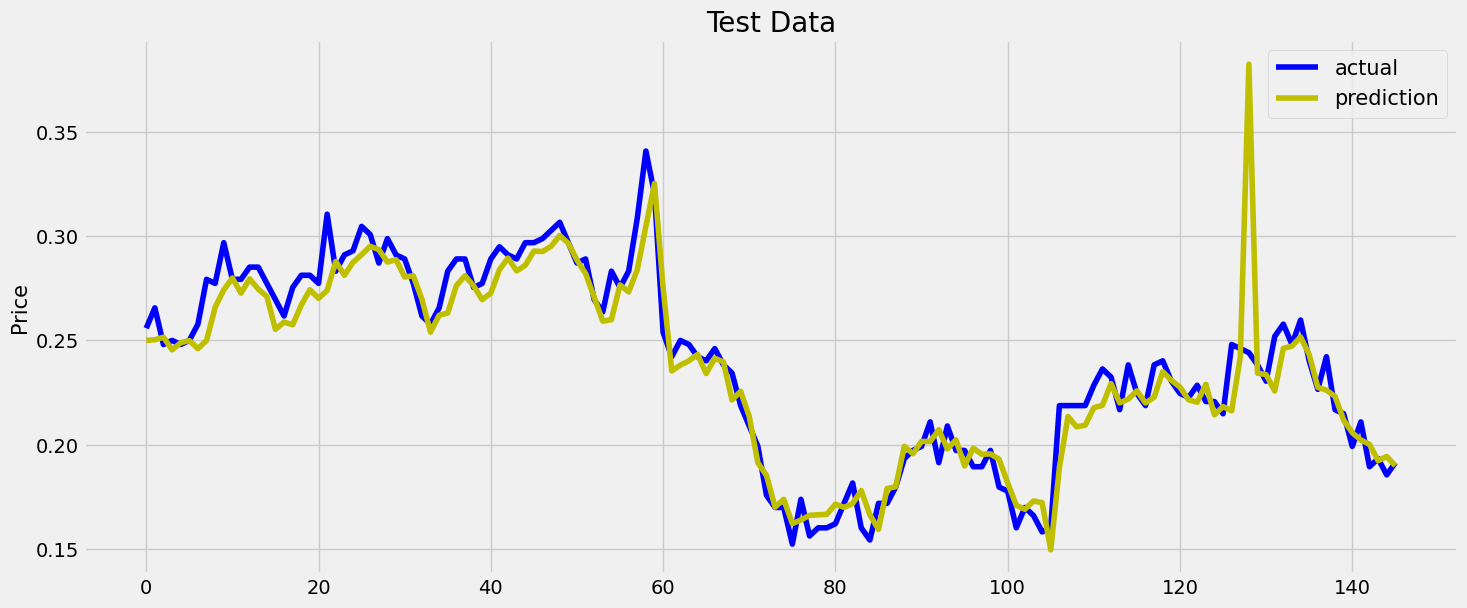

In [310]:
# Komparasi test data Actual vs Prediction
plt.style.context("seaborn-white")
plt.figure(figsize=(15,6))
plt.plot(X_test_norm['Close'].values, 'b', label="actual")
plt.plot(y_pred, 'y', label="prediction")
plt.tight_layout()
plt.title('Test Data')
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.legend(fontsize=15)
plt.show()

###**Prediksi Data Baru**

In [316]:
data_baru = {
    'Open': [7905000000],
    'High': [8010000000],
    'Low': [7840000000],
    'Volume': [14281500]}

In [317]:
# Membuat DataFrame dari data prediksi
df_baru = pd.DataFrame(data_baru)
df_baru

,Open,High,Low,Volume
0,7905000000,8010000000,7840000000,14281500


In [318]:
prediksi = scaler.fit_transform(df_baru)
harga_prediksi = svr.predict(prediksi)
#harga_prediksi = inverse_min_max_normalization(harga_prediksi, min_vals, max_vals)
df_prediksi['Predicted_Close'] = harga_prediksi
print(df_prediksi[['Open', 'High', 'Low', 'Volume', 'Predicted_Close']])

         Open        High         Low    Volume  Predicted_Close
0  7925000000  8000000000  7850000000  14181500         0.119099
